# Importing Necessary Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import sweetviz as sv
import os
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score,f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/annguyen/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py)

In [ ]:
!pip install imblearn

^C
Traceback (most recent call last):
  File "/Users/annguyen/anaconda3/bin/pip", line 7, in <module>
    from pip._internal.cli.main import main
  File "/Users/annguyen/anaconda3/lib/python3.11/site-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/Users/annguyen/anaconda3/lib/python3.11/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/Users/annguyen/anaconda3/lib/python3.11/site-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/Users/annguyen/anaconda3/lib/python3.11/site-packages/pip/_internal/build_env.py", line 15, in <module>
    from pip._vendor.packaging.requirements import Requirement
  File "/Users/annguyen/anaconda3/lib/python3.11/site-packages/pip/_vendor/packaging/requirements.py", line 10, in <module>
    from pip._vend

# Display Settings for max rows and columns in the dataset with ignored warnings.

In [3]:
pd.set_option('mode.chained_assignment', None)  #default='warn'
pd.set_option('display.max_rows', 200) #if df has more than 200 values in its record pd will truncate(shorten the display) the display.
pd.set_option('display.max_columns', 150) #if df has more than 150 columns pd will truncate the display.

# Reading the DataSet

In [4]:
new_df = pd.read_csv('../Data/accepted_2007_to_2018Q4.csv',low_memory=False) #entire file is read into the memeory at once

In [5]:
new_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,...,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,...,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
new_df.shape

(2260701, 151)

# Response Variable

In [7]:
new_df.groupby('loan_status').size() #counts the occurence of each unique value in the loan_status column

loan_status
Charged Off                                             268559
Current                                                 878317
Default                                                     40
Does not meet the credit policy. Status:Charged Off        761
Does not meet the credit policy. Status:Fully Paid        1988
Fully Paid                                             1076751
In Grace Period                                           8436
Late (16-30 days)                                         4349
Late (31-120 days)                                       21467
dtype: int64

# Considering only Fully Paid, Charged off & Default loans.

In [8]:
target = ['Current']
loan_main = new_df.loc[~new_df['loan_status'].isin(target)].copy()
loan_main['loan_status'] = np.where(loan_main['loan_status'].str.contains('Fully'), 0, 1)

In [9]:
loan_main.shape

(1382384, 151)

In [10]:
loan_main.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,0,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,...,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,0,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,...,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Converting employee_length to numerical.

In [11]:
loan_main['emp_length'] = loan_main['emp_length'].fillna('< 1 year').replace({'10+ years': 10, '6 years': 6, '4 years': 4, '< 1 year': 0.5, '2 years': 2, '9 years': 9, '5 years': 5, '3 years': 3, '7 years': 7, '1 year': 1, '8 years': 8})

# Segregating the loan_main dataset into two based on the Application_Type (Individual / Joint Type)

In [12]:
individual_loan = loan_main[loan_main['application_type'] == 'Individual']
joint_loan = loan_main[loan_main['application_type'] == 'Joint App']

In [13]:
joint_loan.shape

(29584, 151)

In [14]:
joint_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10.0,MORTGAGE,63000.00,Not Verified,Dec-2015,0,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.00,2705.92,0.0,0.00,0.0000,Jun-2017,15813.30,NaN,Mar-2019,704.0,700.0,0.0,NaN,1.0,Joint App,71000.00,13.85,Not Verified,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,...,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,NaN,10.0,NaN,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
438,68340637,NaN,15000.0,15000.0,15000.0,36 months,11.99,498.15,C,C1,Lead Tech,1.0,MORTGAGE,65000.00,Source Verified,Dec-2015,0,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,NaN,919xx,CA,17.56,0.0,Aug-2004,665.0,669.0,0.0,54.0,NaN,9.0,0.0,13028.0,88.3,16.0,w,0.0,0.0,15183.460000,15183.46,15000.00,183.46,0.0,0.00,0.0000,Feb-2016,15208.44,NaN,Feb-2016,769.0,765.0,0.0,NaN,1.0,Joint App,77000.00,15.40,Not Verified,0.0,0.0,231860.0,0.0,0.0,0.0,0.0,30.0,22525.0,74.0,0.0,2.0,2839.0,78.0,14800.0,...,1.0,2.0,2.0,25762.0,295.0,94.2,0.0,0.0,99.0,136.0,13.0,13.0,1.0,28.0,NaN,11.0,54.0,0.0,2.0,7.0,2.0,3.0,4.0,7.0,11.0,7.0,9.0,0.0,0.0,0.0,0.0,92.3,100.0,0.0,0.0,251645.0,35553.0,5100.0,30649.0,NaN,NaN,

# Converting the purpose column into numerical using LabelEncoder.

In [15]:
encoder = LabelEncoder()
joint_loan['purpose'] = encoder.fit_transform(joint_loan['purpose'])

In [16]:
joint_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10.0,MORTGAGE,63000.00,Not Verified,Dec-2015,0,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,3,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.00,2705.92,0.0,0.00,0.0000,Jun-2017,15813.30,NaN,Mar-2019,704.0,700.0,0.0,NaN,1.0,Joint App,71000.00,13.85,Not Verified,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,...,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,NaN,10.0,NaN,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
438,68340637,NaN,15000.0,15000.0,15000.0,36 months,11.99,498.15,C,C1,Lead Tech,1.0,MORTGAGE,65000.00,Source Verified,Dec-2015,0,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,2,NaN,919xx,CA,17.56,0.0,Aug-2004,665.0,669.0,0.0,54.0,NaN,9.0,0.0,13028.0,88.3,16.0,w,0.0,0.0,15183.460000,15183.46,15000.00,183.46,0.0,0.00,0.0000,Feb-2016,15208.44,NaN,Feb-2016,769.0,765.0,0.0,NaN,1.0,Joint App,77000.00,15.40,Not Verified,0.0,0.0,231860.0,0.0,0.0,0.0,0.0,30.0,22525.0,74.0,0.0,2.0,2839.0,78.0,14800.0,...,1.0,2.0,2.0,25762.0,295.0,94.2,0.0,0.0,99.0,136.0,13.0,13.0,1.0,28.0,NaN,11.0,54.0,0.0,2.0,7.0,2.0,3.0,4.0,7.0,11.0,7.0,9.0,0.0,0.0,0.0,0.0,92.3,100.0,0.0,0.0,251645.0,35553.0,5100.0,30649.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Loan issued over time.

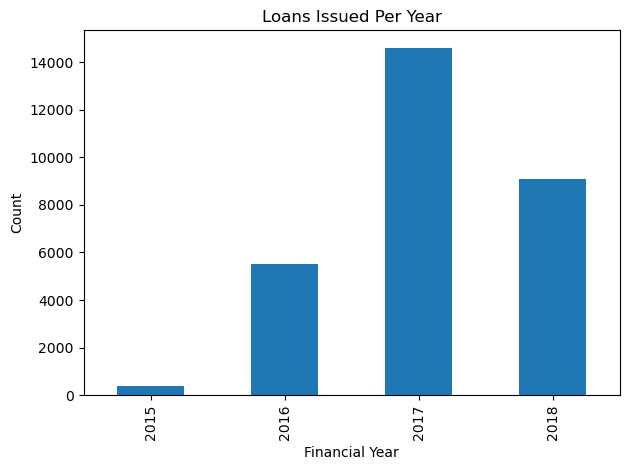

In [17]:
joint_loan['issue_d'] = pd.to_datetime(joint_loan['issue_d'])

yearly_counts = joint_loan['issue_d'].dt.year.value_counts().sort_index()
yearly_counts.plot(kind='bar')

plt.title('Loans Issued Per Year')
plt.xlabel('Financial Year')
plt.ylabel('Count')
plt.tight_layout()

plt.show()


# Creating the Train & Test data.

In [18]:
# Set Fraction
frac = 0.80 #Considering only 80% of the data from joint_loan.

# Get Fractions
new_df_train = joint_loan[joint_loan['issue_d'] < joint_loan['issue_d'].quantile(frac)].copy()
new_df_test = joint_loan[joint_loan['issue_d'] >= joint_loan['issue_d'].quantile(frac)].copy()

# Deep Copy in a zip file.

In [19]:
#Saving as compressed zip files to save space.
new_df_test.to_csv("/Users/rolex/Desktop/IGP/Project/Data/df_test_jl.csv.zip")
new_df_train.to_csv("/Users/rolex/Desktop/IGP/Project/Data/df_train_jl.csv.zip")

In [20]:
new_df_train.shape , new_df_test.shape

((22963, 151), (6621, 151))

# Drop Leak Columns

In [21]:
column_drop = [
    'acc_now_delinq', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 
     'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 
     'disbursement_method', 'funded_amnt', 'funded_amnt_inv', 'hardship_flag', 'inq_last_6mths', 'last_credit_pull_d', 
     'initial_list_status', 'mo_sin_old_rev_tl_op', 'mo_sin_old_il_acct','last_pymnt_amnt', 'last_pymnt_d', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 
     'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'sec_app_collections_12_mths_ex_med',
     'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 
     'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',  
     'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq',     'percent_bc_gt_75', 'pymnt_plan', 'recoveries', 
     'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'last_fico_range_high','last_fico_range_low','url','id','title','addr_state',
     'tot_hi_cred_lim','total_bal_ex_mort', 'total_bc_limit', 'sec_app_chargeoff_within_12_mths',
     'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 
     'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 
     'total_rev_hi_lim'
] # List of columns to drop

# Drop columns
new_df_drop = new_df_train.drop(columns=column_drop)
dropped_columns_count = len(column_drop)

print("After Dropping, the new DataFrame contains {} features and lost a total of {} features".format(new_df_drop.shape[1], dropped_columns_count))


After Dropping, the new DataFrame contains 84 features and lost a total of 67 features


In [22]:
new_df_drop.shape

(22963, 84)

#  Removing features that contains value == 1

In [23]:
# Finding unique values in each feature
nunique_value = new_df_drop.nunique()

# Finding columns with only one unique value
single_value_cols = nunique_value[nunique_value == 1].index.tolist()

print(single_value_cols)

['policy_code', 'application_type', 'hardship_type', 'deferral_term', 'hardship_length']


In [24]:
# Drop columns with only one unique value
new_df_drop = new_df_drop.drop(columns = single_value_cols)

In [25]:
new_df_drop.shape

(22963, 79)

# Creating a DataFrame to record the missing mean.

In [26]:
# Calculate mean of NaN values in each column
mean_nan_df = pd.DataFrame({'mean_nan': new_df_drop.isna().mean(), 'dtypes': new_df_drop.dtypes})

# Sorted DataFrame by mean_nan values in descending order
mean_nan_df = mean_nan_df.sort_values(by='mean_nan', ascending=False).reset_index()

mean_nan_df.head()

,index,mean_nan,dtypes
0,member_id,1.000000,float64
1,desc,1.000000,object
2,orig_projected_additional_accrued_interest,0.988111,float64
3,hardship_last_payment_amount,0.983582,float64
4,hardship_payoff_balance_amount,0.983582,float64


# Dropping features that contains missing data.

In [27]:
# Calculate percentage of missing values for each column
missing_data = new_df_drop.isnull().sum() / len(new_df_drop) * 100

# Filter columns with missing values less than 50%
missing_variable = missing_data[missing_data < 50].index.tolist()

# Columns with missing values more than 50%
drop_columns1 = list(set(new_df_drop.columns) - set(missing_variable))

# Drop columns based on missing data more than 50%
new_df_drop_nan = new_df_drop.drop(columns=drop_columns1)


In [28]:
new_df_drop_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22963 entries, 2 to 2260663
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   loan_amnt                  22963 non-null  float64       
 1   term                       22963 non-null  object        
 2   int_rate                   22963 non-null  float64       
 3   installment                22963 non-null  float64       
 4   grade                      22963 non-null  object        
 5   sub_grade                  22963 non-null  object        
 6   emp_title                  19652 non-null  object        
 7   emp_length                 22963 non-null  float64       
 8   home_ownership             22963 non-null  object        
 9   annual_inc                 22963 non-null  float64       
 10  verification_status        22963 non-null  object        
 11  issue_d                    22963 non-null  datetime64[ns]
 12  loan_st

# Report using the Sweetviz library to analyze the 'new_df_drop_nan'.

In [29]:
# Defining the DataFrame without the 'issue_d' column
df_without_issue_d = new_df_drop_nan.drop(columns='issue_d')

# Generating the Sweetviz report
my_report = sv.analyze([df_without_issue_d, "Training Data"], target_feat="loan_status")

                                             |      | [  0%]   00:00 -> (? left)

In [30]:
my_report.show_html('joint_loan.html')

Report joint_loan.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Custom Summary to convert categorical features into numerical ones.

In [31]:
#This function will be applied on the testing data, to get the exact kind of transformation
def convert_object_to_numeric(df_catg):
    
    #A deep copy of the DataFrame
    numerical_df = df_catg.copy()
    
    #List to keep track of columns to drop at the end
    drop_columns = ['emp_title']
    
    #Handling missing values in 'mort_acc' column
    numerical_df['mort_acc'] = np.where(numerical_df['mort_acc'].isnull(), 0, numerical_df['mort_acc'])
    
    #Convert 'pub_rec_bankruptcies' and 'pub_rec' features to binary
    numerical_df['pub_rec_bankruptcies'] = np.where(numerical_df['pub_rec_bankruptcies'] > 0, 1, 0)
    numerical_df['pub_rec'] = np.where(numerical_df['pub_rec'] > 0, 1, 0)
    
    # Dictionaries for mapping categorical values to numerical values
    term_map = {' 36 months': 1, ' 60 months': 2}
    grade_map = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}
    sub_grade_map = {'G5': 0, 'G4': 1, 'G3': 2, 'G2': 3, 'G1': 4,
                        'F5': 5, 'F4': 6, 'F3': 7, 'F2': 8, 'F1': 9,
                        'E5': 10, 'E4': 11, 'E3': 12, 'E2': 13, 'E1': 14,
                        'D5': 15, 'D4': 16, 'D3': 17, 'D2': 18, 'D1': 19,
                        'C5': 20, 'C4': 21, 'C3': 22, 'C2': 23, 'C1': 24,
                        'B5': 25, 'B4': 26, 'B3': 27, 'B2': 28, 'B1': 29,
                        'A5': 30, 'A4': 31, 'A3': 32, 'A2': 33, 'A1': 34}
    home_map = {'MORTGAGE': 4, 'RENT': 3, 'OWN': 5, 'ANY': 2, 'OTHER': 1, 'NONE': 0}
    ver_status_map = {'Source Verified': 2, 'Verified': 1, 'Not Verified': 0} 

    # Replacements
    numerical_df['verification_status_joint'] = np.where(numerical_df['verification_status_joint'].isnull(), 'Not Verified', numerical_df['verification_status_joint'])

    # Applying mappings
    numerical_df.replace({'term': term_map, 'grade': grade_map, 'sub_grade': sub_grade_map,
                    'home_ownership': home_map, 'verification_status': ver_status_map,
                    'verification_status_joint': ver_status_map}, inplace=True)
    
    drop_columns.append('zip_code')
    
    # Handling missing values
    numerical_df['il_util'] = numerical_df['il_util'].fillna(numerical_df['il_util'].mean())
    numerical_df['revol_util'] = numerical_df['revol_util'].fillna(numerical_df['revol_util'].mean())
    numerical_df['dti'] = numerical_df['dti'].fillna(numerical_df['dti'].mean())

    # Calculating features
    numerical_df['fico_avg_score'] = (numerical_df['fico_range_high'] + numerical_df['fico_range_low']) / 2
    numerical_df['sec_fico_avg_score'] = (numerical_df['sec_app_fico_range_high'] + numerical_df['sec_app_fico_range_low']) / 2
    
    # Converting to datetime and calculating credit history
    numerical_df['earliest_cr_line'] = pd.to_datetime(numerical_df['earliest_cr_line'], infer_datetime_format=True)
    numerical_df['issue_d'] = pd.to_datetime(numerical_df['issue_d'], infer_datetime_format=True)
    numerical_df['credit_hist'] = (numerical_df['issue_d'] - numerical_df['earliest_cr_line']).dt.days
    
    # Handling second applicant's credit history
    numerical_df['sec_app_earliest_cr_line'] = pd.to_datetime(numerical_df['sec_app_earliest_cr_line'], infer_datetime_format=True)
    numerical_df['sec_credit_hist'] = (numerical_df['issue_d'] - numerical_df['sec_app_earliest_cr_line']).dt.days
    
    # Calculating balance to annual income ratio
    numerical_df['balance_annual_inc'] = np.where(numerical_df['annual_inc'] == 0, 0, numerical_df['loan_amnt'] / numerical_df['annual_inc'])
    numerical_df['sec_balance_annual_inc'] = np.where(numerical_df['annual_inc_joint'] == 0, 0, numerical_df['loan_amnt'] / numerical_df['annual_inc_joint'])
    
    # Log transforming certain features
    log_transform_cols = ['annual_inc', 'annual_inc_joint', 'total_bal_il', 'revol_bal', 'revol_bal_joint', 'max_bal_bc']
    for col in log_transform_cols:
        numerical_df[col] = np.log(numerical_df[col] + 1)
    
    # Calculating ratio features
    numerical_df['inst_amnt_ratio'] = numerical_df['installment'] / numerical_df['loan_amnt']
    numerical_df['credit_line_ratio'] = numerical_df['open_acc'] / numerical_df['total_acc']
    
    # Dropping columns
    drop_columns.extend(['fico_range_high', 'fico_range_low', 'sec_app_fico_range_high', 'sec_app_fico_range_low',
                          'earliest_cr_line', 'sec_app_earliest_cr_line', 'issue_d', 'installment', 'loan_amnt',
                          'open_acc', 'total_acc'])
    numerical_df = numerical_df.drop(columns = drop_columns)
    
    # Dropping rows with any missing values
    #numerical_df = numerical_df.dropna()
    
    return numerical_df


### Converting categorical features to numerical by applying the custom function

In [32]:
numerical_df = convert_object_to_numeric(new_df_drop_nan)
numerical_df.head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec,revol_bal,revol_util,annual_inc_joint,dti_joint,verification_status_joint,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,mort_acc,pub_rec_bankruptcies,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,fico_avg_score,sec_fico_avg_score,credit_hist,sec_credit_hist,balance_annual_inc,sec_balance_annual_inc,inst_amnt_ratio,credit_line_ratio
2,2,10.78,6,26,10.0,4,11.050906,0,0,3,10.78,0,8.970813,56.2,11.170449,13.85,0,0.0,1.0,0.0,4.0,19.0,9.289891,73.0,0.0,2.0,7.641084,65.0,2.0,5.0,1.0,5.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,697.0,NaN,5600,NaN,0.317460,0.281690,0.021633,0.333333
438,1,11.99,5,24,1.0,4,11.082158,2,0,2,17.56,0,9.474933,88.3,11.251574,15.40,0,0.0,0.0,0.0,0.0,30.0,10.022425,74.0,0.0,2.0,7.951559,78.0,3.0,1.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,667.0,NaN,4139,NaN,0.230769,0.194805,0.033210,0.562500
509,2,23.13,2,8,6.0,4,10.679044,1,0,2,35.70,1,9.434204,73.1,11.637927,25.44,0,0.0,6.0,2.0,5.0,10.0,10.791029,75.0,0.0,1.0,8.646641,74.0,1.0,2.0,1.0,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,682.0,NaN,6362,NaN,0.552550,0.211801,0.028265,0.590909
529,2,13.44,5,22,1.0,4,11.472114,1,0,1,22.70,1,9.873235,53.3,11.669938,22.76,0,0.0,4.0,1.0,3.0,10.0,10.672345,70.0,1.0,3.0,8.734077,64.0,2.0,0.0,5.0,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,677.0,NaN,5296,NaN,0.250000,0.205128,0.022979,0.541667
664,1,18.99,3,14,1.0,3,10.293003,1,1,2,46.71,1,7.788626,96.5,11.454759,17.07,0,2.0,6.0,2.0,3.0,3.0,11.432951,89.0,0.0,1.0,7.285507,89.0,4.0,0.0,8.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,682.0,NaN,6331,NaN,0.296366,0.092741,0.036651,0.750000


# Drop Columns for test data.

In [33]:
column_drop = [
    'acc_now_delinq', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 
     'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 
     'disbursement_method', 'funded_amnt', 'funded_amnt_inv', 'hardship_flag', 'inq_last_6mths', 'last_credit_pull_d', 
     'initial_list_status', 'mo_sin_old_rev_tl_op', 'mo_sin_old_il_acct','last_pymnt_amnt', 'last_pymnt_d', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 
     'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'sec_app_collections_12_mths_ex_med',
     'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 
     'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',  
     'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq',     'percent_bc_gt_75', 'pymnt_plan', 'recoveries', 
     'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'last_fico_range_high','last_fico_range_low','url','id','title','addr_state',
     'tot_hi_cred_lim','total_bal_ex_mort', 'total_bc_limit', 'sec_app_chargeoff_within_12_mths',
     'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 
     'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 
     'total_rev_hi_lim'
] # List of columns to drop


# Drop columns for test data
new_df_test_drop = new_df_test.drop(columns=column_drop)
dropped_columns_count = len(column_drop)

print("After Dropping, the new DataFrame contains {} features and lost a total of {} features".format(new_df_test_drop.shape[1], dropped_columns_count))


After Dropping, the new DataFrame contains 84 features and lost a total of 67 features


In [34]:
# Finding unique values in each feature
nunique_value = new_df_test_drop.nunique()

# Finding columns with only one unique value
single_value_cols = nunique_value[nunique_value == 1].index.tolist()

print(single_value_cols)

['policy_code', 'application_type', 'hardship_type', 'deferral_term', 'hardship_length']


In [35]:
# Drop columns with only one unique value
new_df_test_drop = new_df_test_drop.drop(columns = single_value_cols)
new_df_test_drop.shape

(6621, 79)

In [36]:
# Calculate mean of NaN values in each column
mean_nan_df = pd.DataFrame({'mean_nan': new_df_test_drop.isna().mean(), 'dtypes': new_df_test_drop.dtypes})

# Sorted DataFrame by mean_nan values in descending order
mean_nan_df = mean_nan_df.sort_values(by='mean_nan', ascending=False).reset_index()

mean_nan_df.head()

,index,mean_nan,dtypes
0,member_id,1.000000,float64
1,desc,1.000000,object
2,orig_projected_additional_accrued_interest,0.996526,float64
3,hardship_last_payment_amount,0.996375,float64
4,hardship_payoff_balance_amount,0.996375,float64


In [37]:
# Calculate percentage of missing values for each column in the testing data
missing_data_test = new_df_test_drop.isnull().sum() / len(new_df_test_drop) * 100

# Filter columns with missing values more than 50%
drop_columns_test = missing_data_test[missing_data_test >= 50].index.tolist()

# Drop columns based on missing data more than 50%
new_df_test_drop_nan = new_df_test_drop.drop(columns=drop_columns_test)


# Categorical to numeric test data.

In [38]:
#make numerical
df_test_num = convert_object_to_numeric(new_df_test_drop_nan)

# Deep Copy.

In [39]:
numerical_df.to_csv("/Users/rolex/Desktop/IGP/Project/Data/df_train_jl_scaled.csv")

# Model Building.

In [40]:
scaler = StandardScaler()

#copy of numerical features in the training dataset
df_train_num_copy = numerical_df.copy()

# Define the target column
target_feature = 'loan_status'

# Define feature space
X_train = df_train_num_copy.drop(columns=[target_feature])
X_test = df_test_num.drop(columns=[target_feature])

# Define target variable
y_train = df_train_num_copy[target_feature]
y_test = df_test_num[target_feature]

# Handle missing values using SimpleImputer
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features using StandardScaler
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


### Dictionaries to store ROC and precision-recall curve data

In [41]:
roc_dict = {}
prc_dict = {}

# function to modify ROC dictionary
def update_roc_dict(clf, y_test, X_test, name, dict_modify):
    """
    Updates a dictionary with ROC metrics for a given classifier.
    """
    fpr, tpr, thresholds = roc_curve(y_test,
                                     clf.predict_proba(X_test)[:,1],
                                     pos_label=1)
    clf_roc_dict = {'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds}
    dict_modify[name] = clf_roc_dict

# function to modify precision-recall dictionary
def update_prc_dict(clf, y_test, X_test, name, dict_modify):
    """
    Updates a dictionary with precision-recall metrics for a given classifier.
    """
    precision, recall, thresholds = precision_recall_curve(y_test,
                                     clf.predict_proba(X_test)[:,1],
                                     pos_label=1)
    clf_prc_dict = {'precision': precision, 'recall': recall, 'thresholds': thresholds}
    dict_modify[name] = clf_prc_dict

# update_roc_dict(clf, y_test, X_test, 'classifier_name', roc_dict)
# update_prc_dict(clf, y_test, X_test, 'classifier_name', prc_dict)


### Custom function to fit a classifier from scikit-learn that returns a DataFrame containing classification report.
    

In [42]:
def fit_score_classifier(classifier, X_train, y_train, X_test, y_test, name='classifier'):
    """
    Parameters:
        classifier (sklearn classifier): Classifier object
        X_train (numpy array): Training features
        y_train (numpy array): Training labels
        X_test (numpy array): Test features
        y_test (numpy array): Test labels
        name (string): Name of the classifier
        
    Returns:
        pd.DataFrame: DataFrame containing classification report
    """
    #Handle missing values
    #imputer = SimpleImputer()
    #X_train_imputed = imputer.fit_transform(X_train)
    #X_test_imputed = imputer.transform(X_test)
    
    # Fit the classifier to the training data
    classifier.fit(X_train_imputed, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test_imputed)
    
    # Generate classification report and convert it to a DataFrame
    classifier_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    
    # Add classifier name as a column
    classifier_report['classifier'] = name
    
    return classifier_report


## Logistic Regression.

In [43]:
# Instantiate logistic regression with default parameters
lr = LogisticRegression(penalty = 'l2', C = 1.0, solver = 'lbfgs', max_iter = 400, n_jobs = -1)

lr_report = fit_score_classifier(lr, X_train, y_train, X_test, y_test, name = 'lr')
lr_report.head()

/Users/rolex/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,0,1,accuracy,macro avg,weighted avg,classifier
precision,0.670250,0.593801,0.656094,0.632026,0.641303,lr
recall,0.878950,0.290387,0.656094,0.584668,0.656094,lr
f1-score,0.760543,0.390035,0.656094,0.575289,0.620252,lr
support,4114.000000,2507.000000,0.656094,6621.000000,6621.000000,lr


In [44]:
#Metrics for LR
# Handle missing values in the testing dataset using SimpleImputer
X_test_imputed = imputer.transform(X_test)

# Update ROC dictionary
update_roc_dict(clf=lr, y_test=y_test, X_test=X_test_imputed, name='Logistic Regression', dict_modify=roc_dict)

# Update precision-recall dictionary
update_prc_dict(clf=lr, y_test=y_test, X_test=X_test_imputed, name='Logistic Regression', dict_modify=prc_dict)


## Gradient Boosting.

In [45]:
# Instantiate Gradient Boosting Classifier
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)

# Fit and score the classifier
gb.fit(X_train_imputed, y_train)
gb_pred = gb.predict(X_test_imputed)
gb_report = pd.DataFrame(classification_report(y_test, gb_pred, output_dict=True))

# Add classifier name as a column
gb_report['classifier'] = 'gb'

# Display the classification report
gb_report.head()


,0,1,accuracy,macro avg,weighted avg,classifier
precision,0.691171,0.653016,0.683432,0.672093,0.676724,gb
recall,0.886728,0.349821,0.683432,0.618274,0.683432,gb
f1-score,0.776831,0.455584,0.683432,0.616208,0.655193,gb
support,4114.000000,2507.000000,0.683432,6621.000000,6621.000000,gb


In [46]:
#Metrics for GradientBoosting
# Calculate ROC metrics for GB
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, gb.predict_proba(X_test_imputed)[:, 1])
gb_roc_dict = {'fpr': gb_fpr, 'tpr': gb_tpr, 'thresholds': gb_thresholds}
roc_dict['GB'] = gb_roc_dict

# Calculate precision-recall metrics for GBTree
gb_precision, gb_recall, gb_thresholds = precision_recall_curve(y_test, gb.predict_proba(X_test_imputed)[:, 1])
gb_prc_dict = {'precision': gb_precision, 'recall': gb_recall, 'thresholds': gb_thresholds}
prc_dict['GB'] = gb_prc_dict


## Random Forest.

In [47]:
# Instantiate RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Fit the classifier and generate the classification report
rf.fit(X_train_imputed, y_train)
rf_y_pred = rf.predict(X_test_imputed)
rf_report = pd.DataFrame(classification_report(y_test, rf_y_pred, output_dict=True))
rf_report['classifier'] = 'rf'

rf_report.head()


,0,1,accuracy,macro avg,weighted avg,classifier
precision,0.677872,0.632146,0.669536,0.655009,0.660558,rf
recall,0.892076,0.304348,0.669536,0.598212,0.669536,rf
f1-score,0.770361,0.410878,0.669536,0.590619,0.634245,rf
support,4114.000000,2507.000000,0.669536,6621.000000,6621.000000,rf


In [48]:
#Metrics for RandomForest
# Compute ROC metrics for RandomForest
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test_imputed)[:,1], pos_label=1)
rf_roc_dict = {'fpr': rf_fpr, 'tpr': rf_tpr, 'thresholds': rf_thresholds}
roc_dict['RandomForest'] = rf_roc_dict

# Compute precision-recall metrics for RandomForest
rf_precision, rf_recall, rf_thresholds = precision_recall_curve(y_test, rf.predict_proba(X_test_imputed)[:,1], pos_label=1)
rf_prc_dict = {'precision': rf_precision, 'recall': rf_recall, 'thresholds': rf_thresholds}
prc_dict['RandomForest'] = rf_prc_dict

## XGBoost.

In [49]:
# Define XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_estimators=300, subsample=0.9, n_jobs=-1)

# Fit the classifier and generate classification report
xgb_clf.fit(X_train_imputed, y_train)
y_pred_xgb = xgb_clf.predict(X_test_imputed)
xgb_report = pd.DataFrame(classification_report(y_test, y_pred_xgb, output_dict=True))
xgb_report['classifier'] = 'xgb'

xgb_report.head()

,0,1,accuracy,macro avg,weighted avg,classifier
precision,0.692894,0.575311,0.661531,0.634103,0.648372,xgb
recall,0.817696,0.405265,0.661531,0.611480,0.661531,xgb
f1-score,0.750139,0.475544,0.661531,0.612842,0.646166,xgb
support,4114.000000,2507.000000,0.661531,6621.000000,6621.000000,xgb


In [50]:
#Metrics for XGBoost
# Update ROC dictionary for XGBoost
update_roc_dict(xgb_clf, y_test, X_test, name='XGBoost', dict_modify=roc_dict)

# Update precision-recall dictionary for XGBoost
update_prc_dict(clf=xgb_clf, y_test=y_test, X_test=X_test, name='XGBoost', dict_modify=prc_dict)


## Support Vector Classifier.

In [51]:
# Set up SVC classifier with a hard limit on iterations
svc = SVC(C=1.0, kernel='rbf', gamma='auto', probability=True, max_iter=400)

# Fit and score SVC classifier
svc_report = fit_score_classifier(svc, X_train, y_train, X_test, y_test, name='svc')
svc_report.head()


,0,1,accuracy,macro avg,weighted avg,classifier
precision,0.621356,0.0,0.621356,0.310678,0.386084,svc
recall,1.000000,0.0,0.621356,0.500000,0.621356,svc
f1-score,0.766465,0.0,0.621356,0.383232,0.476248,svc
support,4114.000000,2507.0,0.621356,6621.000000,6621.000000,svc


In [52]:
# Define the SVC model with a pipeline including an imputer
svc = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', SVC(C=1.0, kernel='rbf', gamma='auto', probability=True, max_iter=400))
])

# Fit the model
svc.fit(X_train, y_train)

# Update ROC dictionary for SVC
update_roc_dict(svc, y_test, X_test, 'SVC', roc_dict)

# Update precision-recall dictionary for SVC
update_prc_dict(svc, y_test, X_test, 'SVC', prc_dict)

## KNearestNeighbors Classifier.

In [53]:
# imputer to handle NaN values
imputer = SimpleImputer(strategy='mean')

# Impute NaN values in the training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Define the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Fit the classifier and generate the classification report
knn.fit(X_train_imputed, y_train)
knn_y_pred = knn.predict(X_test_imputed)
knn_classification_report = classification_report(y_test, knn_y_pred, output_dict=True)
knn_report = pd.DataFrame(knn_classification_report)

# Add the classifier name as a column
knn_report['classifier'] = 'KNN'

# Display the classification report
knn_report.head()

,0,1,accuracy,macro avg,weighted avg,classifier
precision,0.642063,0.439737,0.590847,0.540900,0.565454,KNN
recall,0.771755,0.293977,0.590847,0.532866,0.590847,KNN
f1-score,0.700960,0.352379,0.590847,0.526670,0.568972,KNN
support,4114.000000,2507.000000,0.590847,6621.000000,6621.000000,KNN


In [54]:
# Preprocess data to handle NaN values
imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test)

# Update ROC dictionary for KNN
update_roc_dict(knn, y_test, X_test_imputed, 'KNN', roc_dict)

# Update precision-recall dictionary for KNN
update_prc_dict(clf=knn, y_test=y_test, X_test=X_test_imputed, name='KNN', dict_modify=prc_dict)


# Check Keys

In [55]:
roc_dict.keys()

dict_keys(['Logistic Regression', 'GB', 'RandomForest', 'XGBoost', 'SVC', 'KNN'])

# Plot Models.

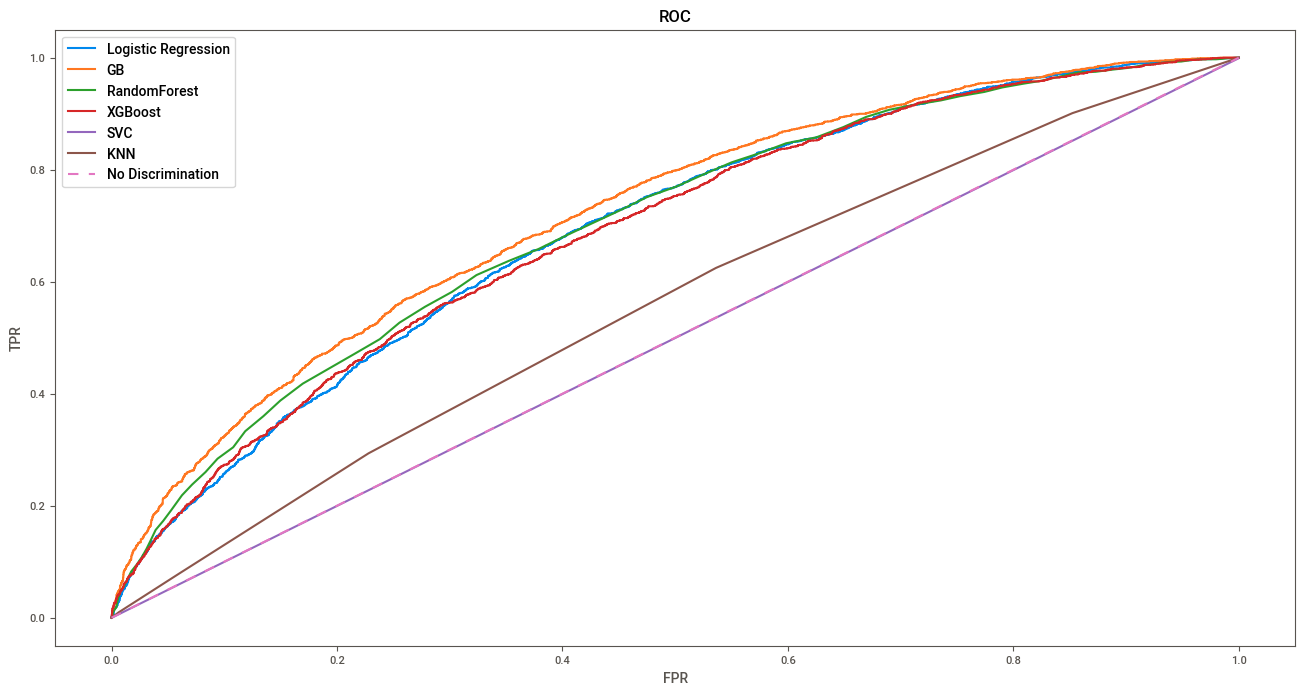

In [60]:
#ROC Curve
plt.figure(figsize=(16, 8))

# Iterate over keys and values in roc_dict
for key, clf in roc_dict.items():
    plt.plot(clf['fpr'], clf['tpr'], label=key)

# Plot settings
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0,1], [0,1], label='No Discrimination', linestyle='-', dashes=(5, 5))
plt.legend()

# Save and display the plot
plt.savefig(os.path.join("/Users/rolex/Desktop/IGP/Project/plots/roc_curve_all_models.png"))
plt.show()


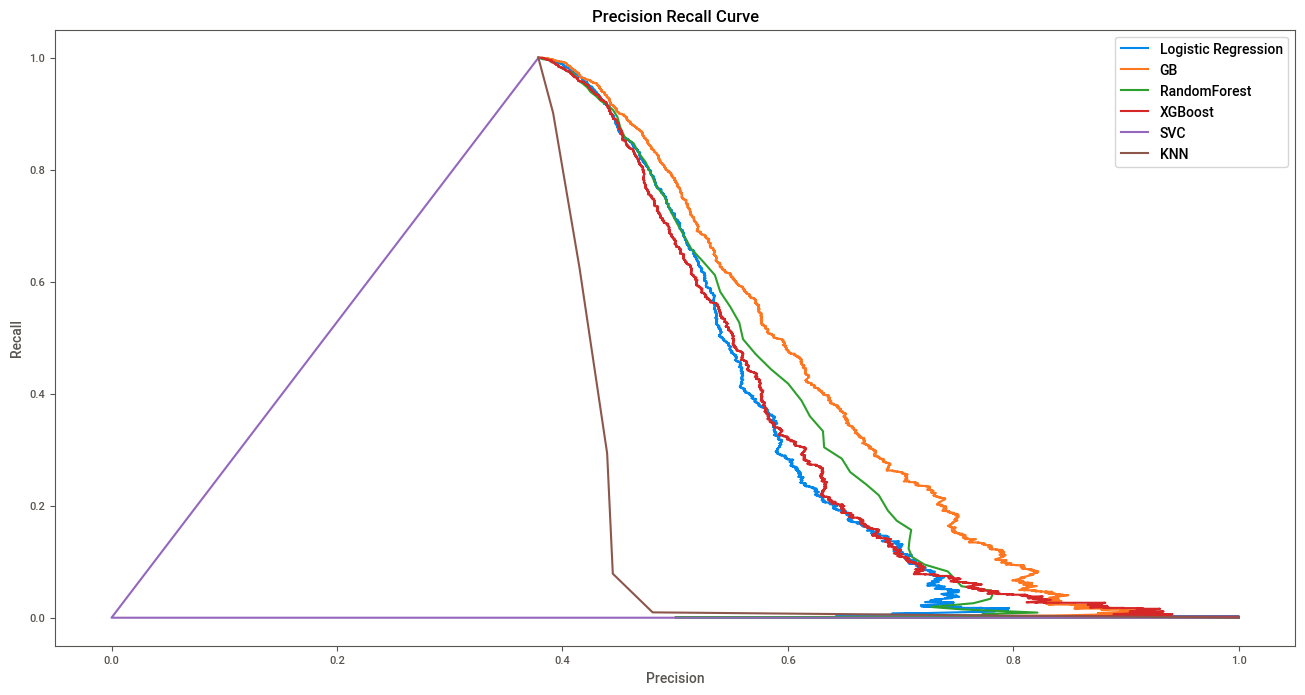

In [61]:
#Precision Recall Curve
plt.figure(figsize=(16, 8))

# Iterate over keys and values in prc_dict
for key, clf in prc_dict.items():
    plt.plot(clf['precision'], clf['recall'], label=key)

# Plot settings
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision Recall Curve")
plt.legend()

# Save and display the plot
plt.savefig(os.path.join("/Users/rolex/Desktop/IGP/Project/plots/PRC_curve_all_models.png"))
plt.show()


# Confusion Matrix

In [59]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initializing and fitting the GradientBoostingClassifier model
gb = GradientBoostingClassifier()
gb.fit(X_train_imputed, y_train)

# Making predictions using the trained model
y_pred = gb.predict(X_test_imputed)

# Computing and printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[3648  466]
 [1630  877]]


# AUC of best performing model.

In [64]:
#imputer to handle missing values
imputer = SimpleImputer(strategy='mean')

# Define a pipeline with imputation and model
pipeline = Pipeline(steps=[('imputer', imputer),
                           ('gb', GradientBoostingClassifier())])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1], pos_label=1)

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, pipeline.predict_proba(X_test)[:, 1], pos_label=1)

# Calculate AUC score for ROC curve
gb_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

# Print AUC score for ROC curve
print("gb_auc: {}".format(gb_auc))


gb_auc: 0.7213063509678974


In [65]:
X_test.head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,pub_rec,revol_bal,revol_util,annual_inc_joint,dti_joint,verification_status_joint,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,mort_acc,pub_rec_bankruptcies,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,fico_avg_score,sec_fico_avg_score,credit_hist,sec_credit_hist,balance_annual_inc,sec_balance_annual_inc,inst_amnt_ratio,credit_line_ratio
421212,2,14.07,5,22,3.0,4,10.463132,1,2,53.03,1,9.609452,60.3,11.482477,21.04,1,3.0,3.0,2.0,3.0,3.0,10.905662,88.0,1.0,1.0,5.293305,80.0,2.0,3.0,3.0,2.0,1,10.067815,3.0,3.0,9.0,63.1,3.0,6.0,682.0,677.0,4230,6909,0.714286,0.257732,0.023305,0.444444
421222,1,17.47,4,19,2.0,3,10.839601,1,1,10.56,1,1.098612,0.1,11.711785,7.47,1,1.0,3.0,0.0,1.0,17.0,10.030384,95.0,2.0,2.0,1.098612,86.0,4.0,0.0,2.0,0.0,0,7.156956,5.0,1.0,13.0,32.0,9.0,12.0,707.0,637.0,3652,4046,0.019608,0.008197,0.035890,0.555556
421291,2,30.65,2,6,4.0,4,10.714440,1,1,43.63,1,9.522227,56.9,11.884496,32.01,1,0.0,9.0,1.0,3.0,8.0,11.212509,102.0,0.0,1.0,7.788626,85.0,1.0,1.0,1.0,1.0,1,11.406030,0.0,3.0,17.0,68.5,5.0,13.0,687.0,672.0,3407,3468,0.444444,0.137931,0.032754,0.857143
421307,1,20.39,4,16,2.0,3,10.341775,0,3,20.79,0,0.000000,0.0,11.643962,21.61,0,0.0,7.0,1.0,3.0,8.0,10.587291,97.0,0.0,1.0,0.000000,93.0,1.0,0.0,3.0,0.0,0,8.526945,3.0,0.0,9.0,82.8,4.0,5.0,707.0,632.0,2130,4230,0.193548,0.052632,0.037363,1.000000
421324,1,19.42,4,17,7.0,4,10.714440,2,2,62.70,0,10.674105,45.0,12.460719,30.04,2,0.0,6.0,0.0,0.0,57.0,11.943941,65.0,0.0,0.0,9.483340,48.0,0.0,0.0,0.0,0.0,0,11.774012,3.0,4.0,20.0,65.1,7.0,18.0,697.0,687.0,5569,7183,0.805556,0.140504,0.036869,0.562500


# Store trained model for deployment.

In [66]:
#directory to save the trained model
save_model_dir = "/Users/rolex/Desktop/IGP/Project/models/gb_default_params_joint.pickle"
print("Saving model at:", save_model_dir)

# Save the model
with open(save_model_dir, 'wb') as file:
    pickle.dump(gb, file, protocol=pickle.HIGHEST_PROTOCOL)


Saving model at: /Users/rolex/Desktop/IGP/Project/models/gb_default_params_joint.pickle


# Feature Importance.

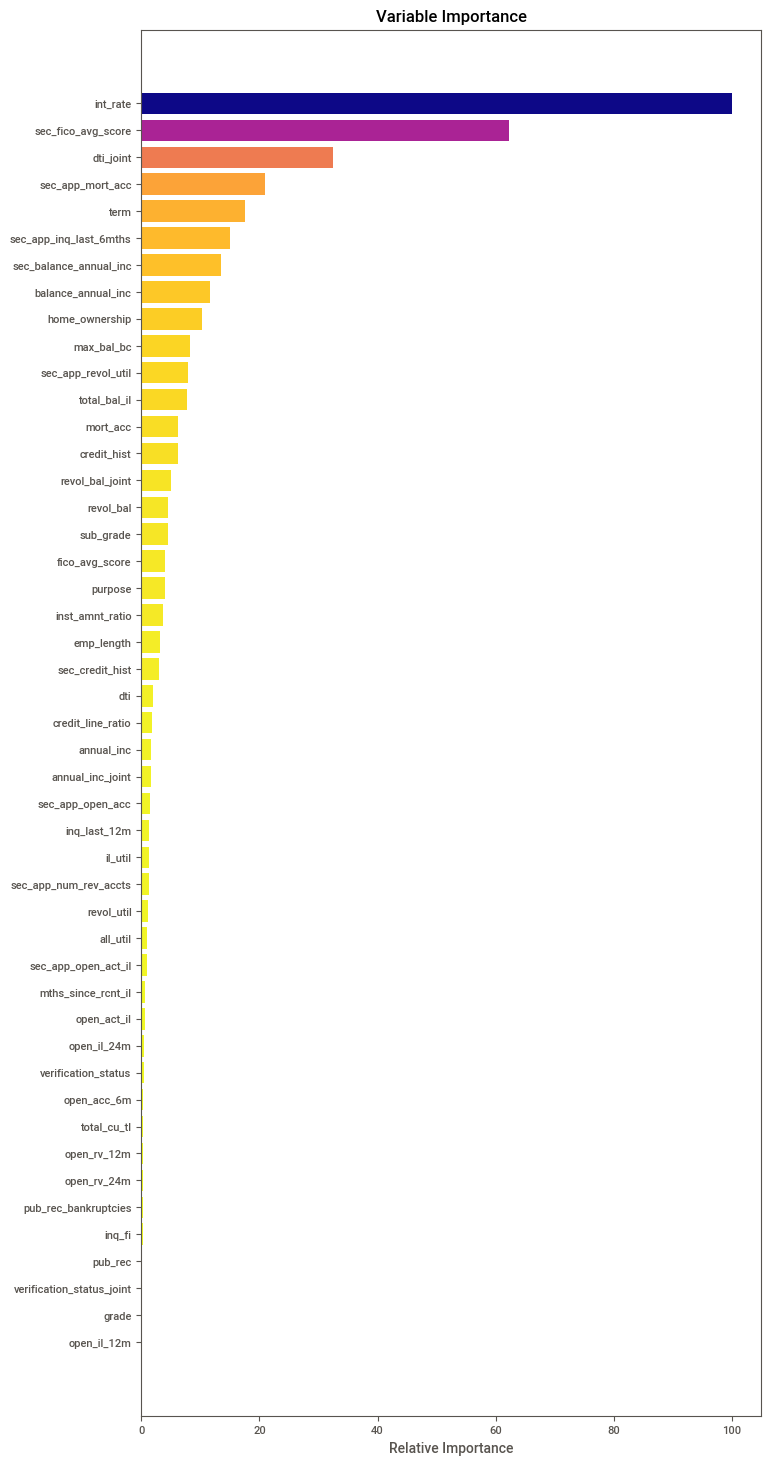

In [73]:
# Calculate feature importance
feature_importance = gb.feature_importances_

# Make importance relative to max importance
relative_importance = 100.0 * (feature_importance / feature_importance.max())

# Sort indices based on relative importance
sorted_idx = np.argsort(relative_importance)

# Create positions for plotting
positions = np.arange(sorted_idx.shape[0]) + .5

# Create a color gradient based on relative importance 
colors = plt.cm.plasma_r(relative_importance[sorted_idx] / 100.0) 

# Plotting
plt.figure(figsize=(8, 18))
plt.barh(positions, relative_importance[sorted_idx], color=colors)
plt.yticks(positions, X_train.columns[sorted_idx]) 
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


In [74]:
X_train.keys()[sorted_idx]

Index(['open_il_12m', 'grade', 'verification_status_joint', 'pub_rec',
       'inq_fi', 'pub_rec_bankruptcies', 'open_rv_24m', 'open_rv_12m',
       'total_cu_tl', 'open_acc_6m', 'verification_status', 'open_il_24m',
       'open_act_il', 'mths_since_rcnt_il', 'sec_app_open_act_il', 'all_util',
       'revol_util', 'sec_app_num_rev_accts', 'il_util', 'inq_last_12m',
       'sec_app_open_acc', 'annual_inc_joint', 'annual_inc',
       'credit_line_ratio', 'dti', 'sec_credit_hist', 'emp_length',
       'inst_amnt_ratio', 'purpose', 'fico_avg_score', 'sub_grade',
       'revol_bal', 'revol_bal_joint', 'credit_hist', 'mort_acc',
       'total_bal_il', 'sec_app_revol_util', 'max_bal_bc', 'home_ownership',
       'balance_annual_inc', 'sec_balance_annual_inc',
       'sec_app_inq_last_6mths', 'term', 'sec_app_mort_acc', 'dti_joint',
       'sec_fico_avg_score', 'int_rate'],
      dtype='object')

In [75]:
#columns to keep
keep_columns = ['credit_hist', 'total_bal_il', 'home_ownership', 'balance_annual_inc',
                'sec_app_revol_util', 'sec_balance_annual_inc', 'term', 'sec_app_inq_last_6mths',
                'sec_app_mort_acc', 'dti_joint', 'sec_fico_avg_score', 'sub_grade']

# Select columns for training data
select_X_train = pd.DataFrame({col: X_train[col] for col in keep_columns})

# Select columns for testing data
select_X_test = pd.DataFrame({col: X_test[col] for col in keep_columns})


# Hyper-Parameter Tuning.

In [80]:
# parameter grid
param_grid = {
    "gbtree__max_depth": [3, 5, 8],
    'gbtree__learning_rate': [0.01, 0.05, 0.1],
    'gbtree__n_estimators': [100, 500, 1000],
}

# Defined preprocessing steps for numerical features
numeric_features = select_X_train.select_dtypes(include=[np.number]).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('gbtree', GradientBoostingClassifier())
])

# classifier
classifier = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    n_jobs=-1,
    cv=4,
    verbose=50,
    scoring='roc_auc'
)

# Fit the classifier to training data
classifier.fit(select_X_train, y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['credit_hist',
                                                                          'total_bal_il',
                                                                          'home_ownership',
                                                                          'balance_annual_inc',
                                                                          'sec_app_revol_util',
                                                                          'sec_balance_annual_inc',
                                                                          'term',
                                                                          'sec_app_inq_last_6mths',
                                                                          'sec_app_mort_acc',
                                                                          'dti_joint',
                                                                          'sec_fico_avg_score',
                                                                          'sub_grade'])])),
                                       ('gbtree',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gbtree__learning_rate': [0.01, 0.05, 0.1],
                         'gbtree__max_depth': [3, 5, 8],
                         'gbtree__n_estimators': [100, 500, 1000]},
             scoring='roc_auc', verbose=50)

In [81]:
# Extract best parameters and score
best_params = classifier.best_params_
best_score = classifier.best_score_

# Print best model parameters
print("Best model parameters: ")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Print best model score
print("\nBest model score: ")
print(best_score)


Best model parameters: 
gbtree__learning_rate: 0.01
gbtree__max_depth: 3
gbtree__n_estimators: 1000

Best model score: 
0.725356890574294


# Confusion matrix on test data

In [84]:
# Predict using the trained classifier
predictions = classifier.predict(select_X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print("\nConfusion matrix on test data:")
print(cm)



Confusion matrix on test data:
[[3620  494]
 [1647  860]]


# F1-Score

In [87]:
# Compute F1 score
f1_gb = f1_score(y_test, y_pred)

# Print F1 score
print("f1_gb (binary): {}\n".format(f1_gb))

# Generate and print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

f1_gb (binary): 0.4555844155844156

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.89      0.78      4114
           1       0.65      0.35      0.46      2507

    accuracy                           0.68      6621
   macro avg       0.67      0.62      0.62      6621
weighted avg       0.68      0.68      0.66      6621



# Compute ROC & PRC Curve.

In [90]:
# Predicted probabilities for positive class
y_proba = classifier.predict_proba(select_X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba, pos_label=1)


# Calculate AUC score for ROC curve.

In [91]:
gb_auc = roc_auc_score(y_test, classifier.best_estimator_.predict_proba(select_X_test)[:,1])

# Print AUC score for ROC curve
print("gb_auc: {}".format(gb_auc))


gb_auc: 0.7102254668939609


# Store model for deployment.

In [92]:
# directory to save the trained model
save_model_dir = "/Users/rolex/Desktop/IGP/Project/models/gb_cv_compact_joint.pkl"
print("Saving model at: {}".format(save_model_dir))

# Save the model
with open(save_model_dir, 'wb') as handle:
    pickle.dump(classifier.best_estimator_, handle)


Saving model at: /Users/rolex/Desktop/IGP/Project/models/gb_cv_compact_joint.pkl


# Random sampling, imputation, and GBC for AUC score.

In [93]:
y_train=y_train.values

In [98]:
"""
Performs 100 iterations of a random sampling experiment with replacement. 
For each iteration, it randomly samples 8000 data points from the training set, imputes missing values using mean imputation,
fits a Gradient Boosting Classifier to the imputed data, and evaluates its performance on the test set by computing the AUC score. 
The AUC scores obtained from each iteration are stored in a list for further analysis.
"""

#imputer transformer to handle missing values
imputer = SimpleImputer(strategy='mean')

# empty list to store AUC scores
auc_arr = []

# Iterate 100 times
for _ in tqdm(range(100)):
    # Randoml sampling 8000 data points with replacement
    idx = np.random.choice(len(select_X_train), 8000, replace=True)
    X_temp = select_X_train.iloc[idx]  # Use iloc to index by row indices
    y_temp = y_train[idx]
    
    # Preprocess the data using imputer
    X_temp_imputed = imputer.fit_transform(X_temp)
    
    # Instantiate and fit the classifier to the new data
    clf = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000, max_depth=3)
    clf.fit(X_temp_imputed, y_temp)
    
    # Predict probabilities on the test set and compute AUC score
    X_test_imputed = imputer.transform(select_X_test)
    score = roc_auc_score(y_test, clf.predict_proba(X_test_imputed)[:, 1])
    
    # Append the AUC score to the list
    auc_arr.append(score)

100%|█████████████████████████████████████████| 100/100 [17:52<00:00, 10.73s/it]


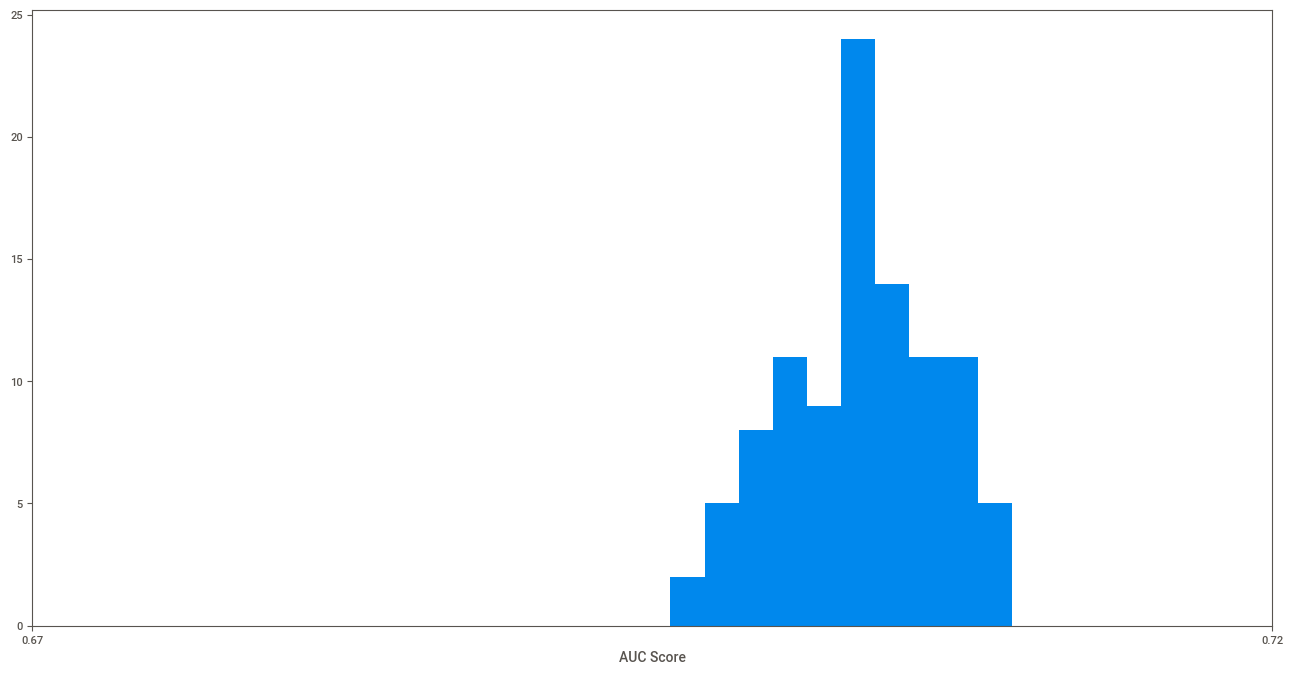

In [99]:
plt.figure(figsize=(16, 8))

# Plot the histogram of AUC scores
plt.hist(auc_arr)
plt.xlabel("AUC Score")
plt.xticks(np.arange(0.67, 0.77, 0.05))
plt.savefig(os.path.join("/Users/rolex/Desktop/IGP/Project/models/auc_sampling_joint.png"))
plt.show()